In [1]:
import rasterio as rt
from rasterio.plot import pt
from sklearn import cluster
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import numpy as np

In [4]:
training_data = rt.open("dataset/eo/2021-09-30-00:00_2021-09-30-23:59_Sentinel-2_L2A_True_color.tiff")
print(training_data.meta)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 1250, 'height': 1765, 'count': 3, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.005863746400000002, 0.0, -126.00872,
       0.0, -0.0032914215297450426, 58.689808)}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


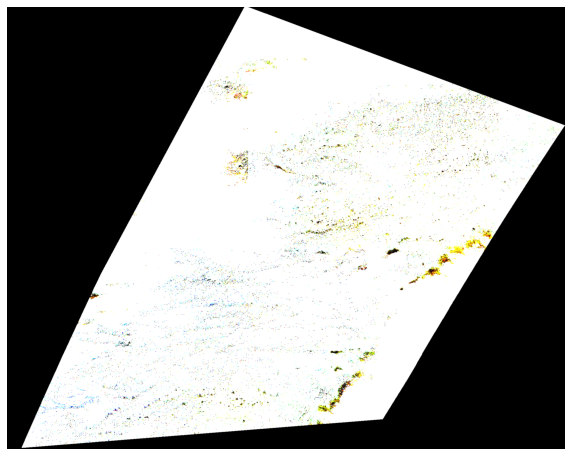

In [6]:
%matplotlib inline
np_arr = training_data.read()
min_val, max_val = np.nanpercentile(np_arr, (6,97))
fig, ax = plt.subplots(figsize=[10,10], ncols=1,nrows=1)
show(training_data, cmap='Greens', vmin=min_val, vmax=max_val, ax=ax)
ax.set_axis_off()
fig.savefig("save_1.jpg", bbox_inches='tight')
plt.show()

In [7]:
np_arr.shape

(3, 1765, 1250)

In [ ]:
percentage_validation = 0.3
validation_path = "dataset/ds_split/validation"
train_path = "dataset/ds_split/train"
sub_dirs = [sub_dir for sub_dir in os.listdir(path_to_all_images)
            if os.path.isdir(os.path.join(path_to_all_images, sub_dir))]
for sub_dir in sub_dirs:
    current_dir = os.path.join(path_to_all_images, sub_dir)
    files = os.listdir(current_dir)
    random.shuffle(files)
    split_idx = int(len(files)*percentage_validation)
    files_for_validation = files[:split_idx]
    files_for_train = files[split_idx:]
    if not os.path.isdir(os.path.join(path_to_train, sub_dir)):
        os.makedirs(os.path.join(path_to_train, sub_dir))
    if not os.path.isdir(os.path.join(path_to_validation, sub_dir)):
        os.makedirs(os.path.join(path_to_validation, sub_dir))
    for file in files_for_train:
        shutil.copy2(os.path.join(current_dir, file),
                     os.path.join(path_to_train, sub_dir))
    for file in files_for_validation:
        shutil.copy2(os.path.join(current_dir, file),
                     os.path.join(path_to_validation, sub_dir))

img_data = np.empty((training_data.height, training_data.width, training_data.count), training_data.meta['dtype'])
img_data.shape


In [9]:
split_dataset = "dataset/S2_data"

batch_size = 64

class_indices = {'Water': 0, 'Forest': 1, 'Land': 2}
num_classes = len(class_indices)

training_path = os.path.join(split_dataset, "train")
validation_path = os.path.join(split_dataset, "validation")


base_model = VGG(include_top=False,
                     weights=None,
                     input_shape=(64, 64, 13))


for band in range(imgxyb.shape[2]):
    img_data[:,:,band] = training_data.read(band+1)

In [10]:
print(img_data.shape)

(1765, 1250, 3)


In [11]:
img = img_data[:,:,:3].reshape((img_data.shape[0]*img_data.shape[1],img_data.shape[2]))

In [12]:
img_data.shape

(2206250, 3)

In [13]:
model = cluster.KMeans(n_clusters=2)
param = cl.fit(img)

In [14]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [15]:
img_ = model.labels_
img_ = img_cl.reshape(imgxyb[:,:,0].shape)
img_.shape

(1765, 1250)

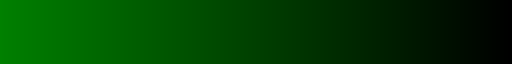

In [16]:
col_map = mc.LinearSegmentedColormap.from_list("", ["green","black"])
col_map

<IPython.core.display.Javascript object>


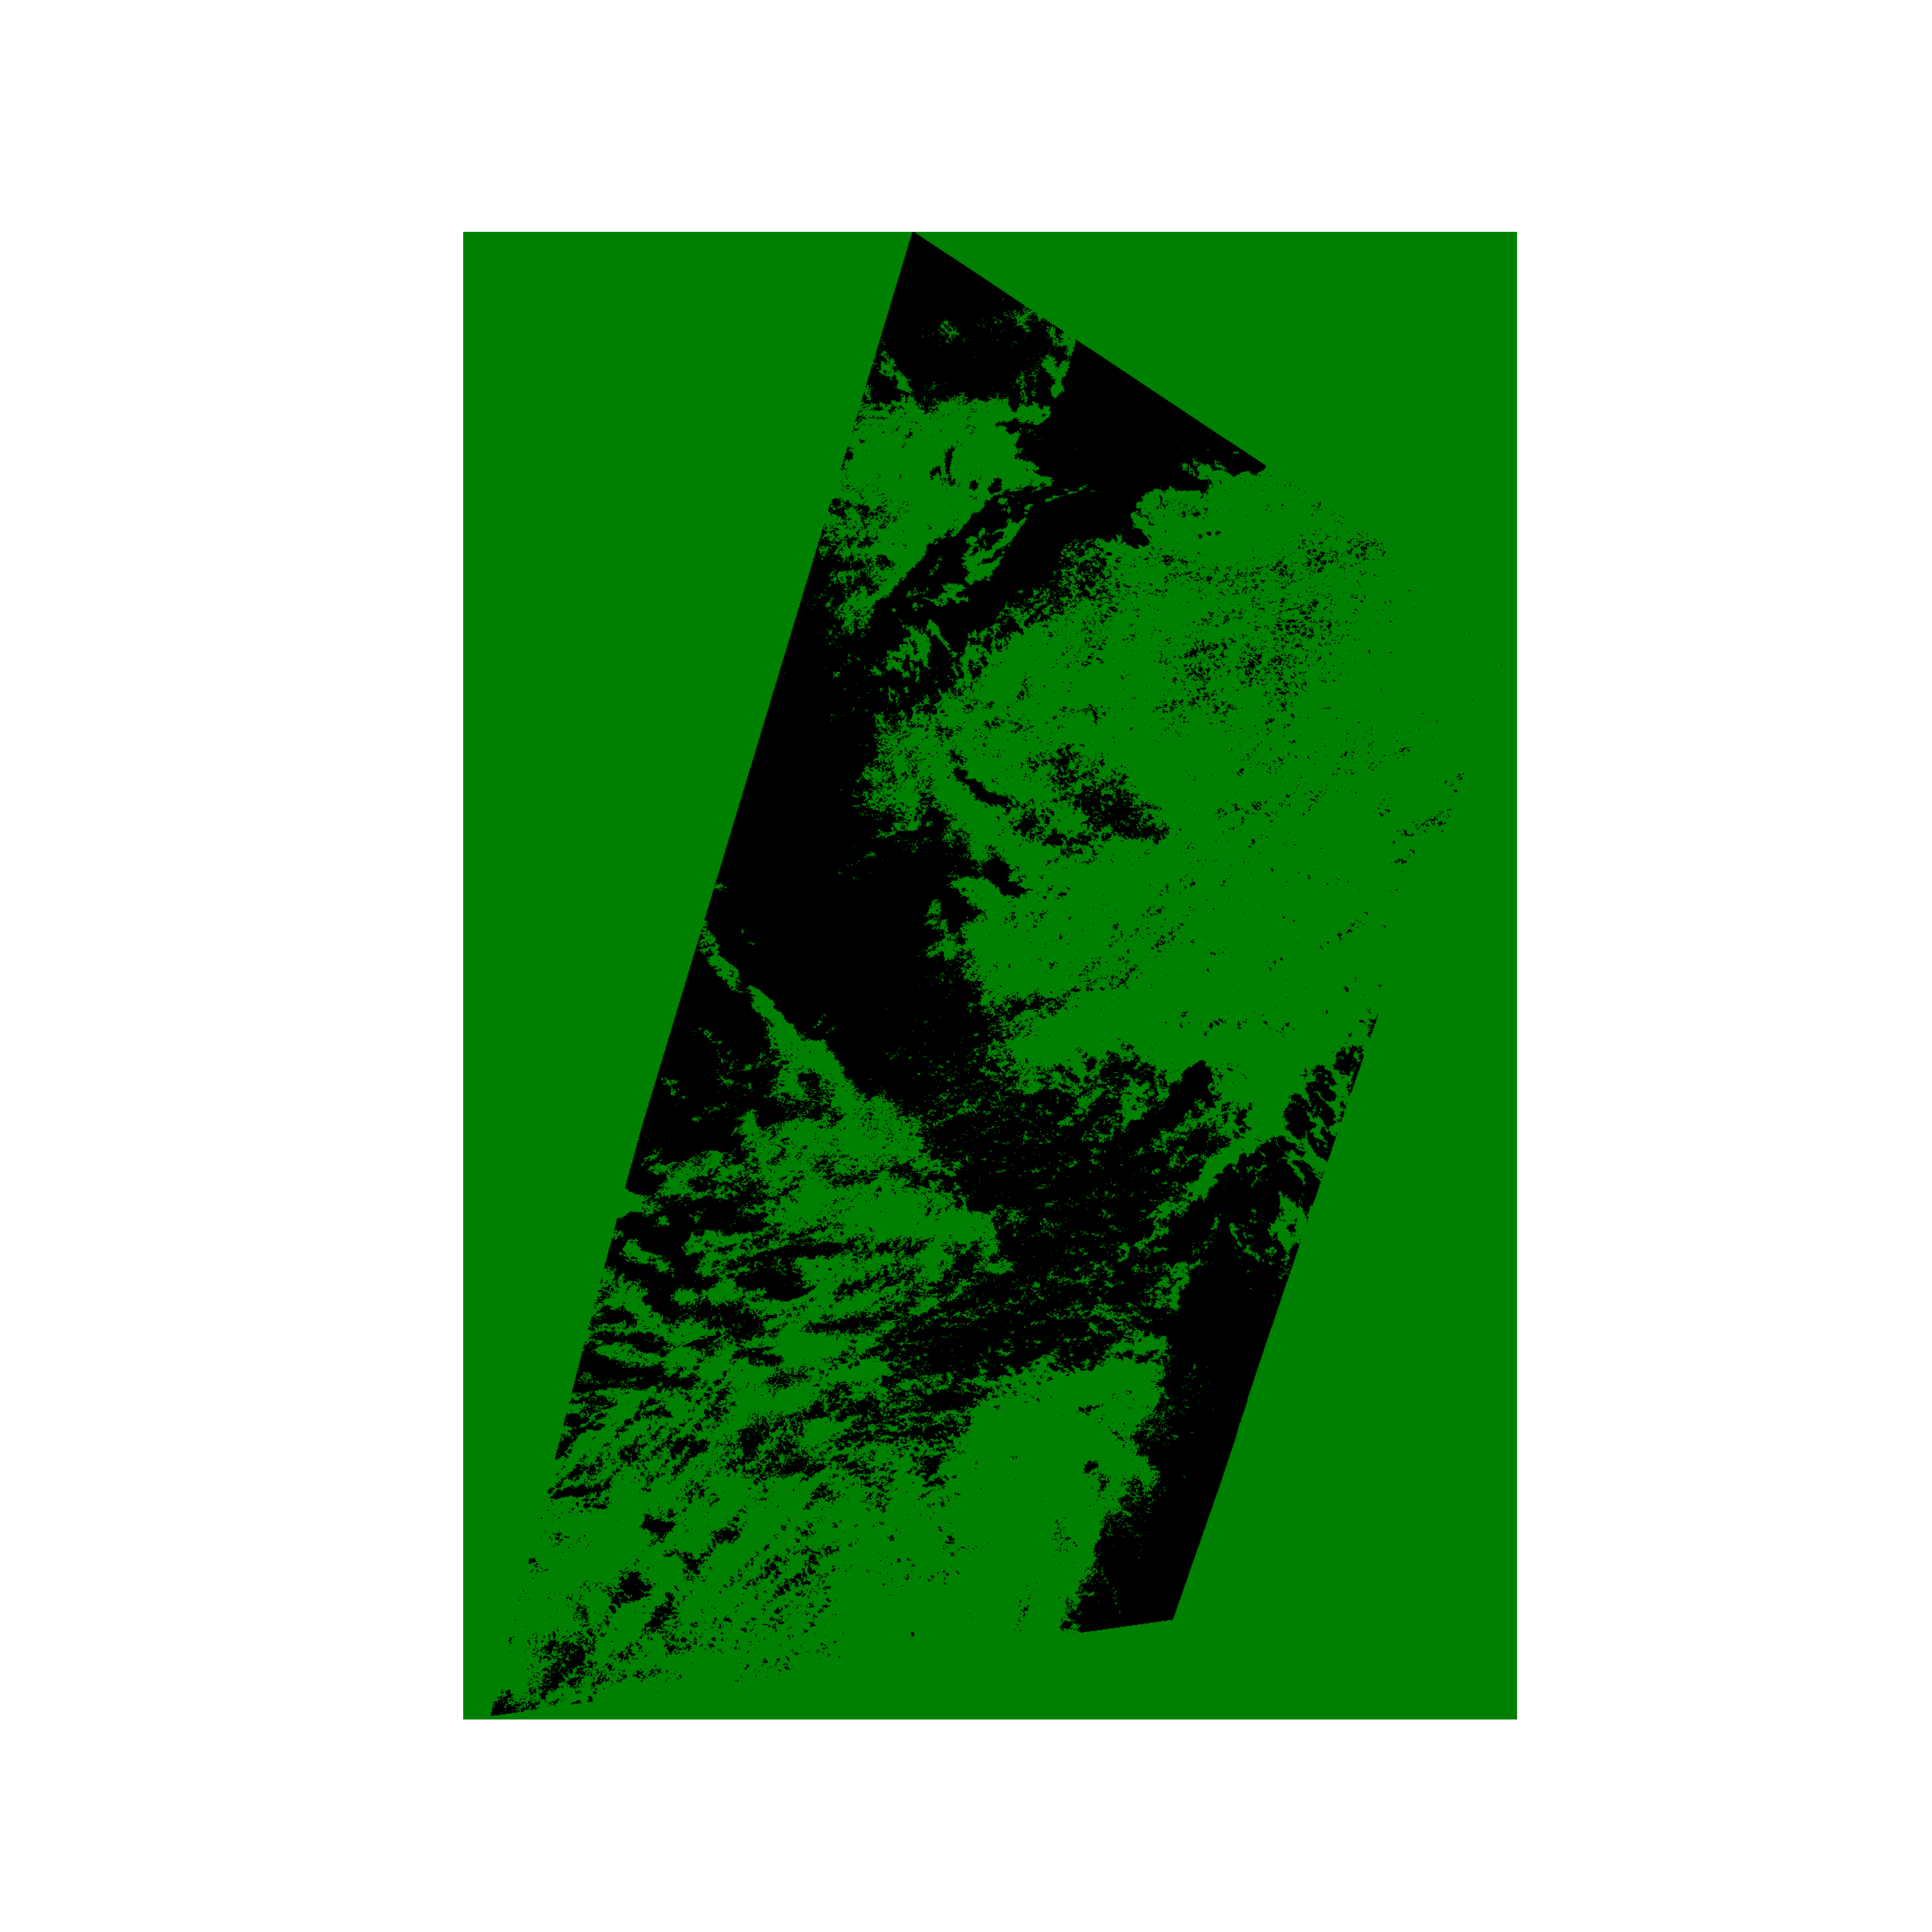

In [17]:
%matplotlib notebook
# %matplotlib inline
plt.figure(figsize=[20,20])
plt.imshow(img_, cmap=col_map)
plt.axis('off')
plt.savefig("pred_before.jpg", bbox_inches='tight')
plt.show()

In [18]:
predict_img = rt.open('dataset/eo/test.tiff')
arr = predict_img.read()
val_min, val_max = np.nanpercentile(arr, (5,95))
predict_img.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 2500,
 'height': 2405,
 'count': 3,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0009931296000000032, 0.0, -130.444622,
        0.0, -0.0005702134046344004, 55.64696223814573)}

In [20]:
data = np.empty((predict_img.height, predict_img.width,predict_img.count), predict_img.meta['dtype'])
for band in range(data.shape[2]):
    data[:,:,band] = predict_img.read(band+1)
values = data[:,:,:3].reshape(data.shape[0]*data.shape[1], data.shape[2])
values.shape

(6012500, 3)

In [21]:
pred = model.predict(one_d)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


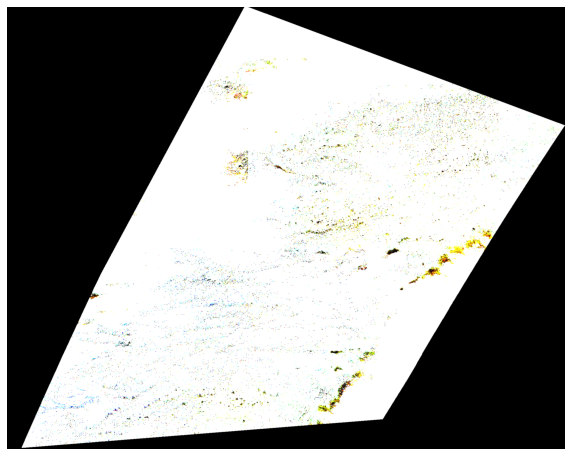

In [22]:
%matplotlib inline
img_data = predict_img.read()
vmin, vmax = np.nanpercentile(elhas_arr, (5,95))
fig, ax = plt.subplots(figsize=[10,10], ncols=1,nrows=1)
show(elhas_raster, cmap='Greens', vmin=vmin, vmax=vmax, ax=ax)
ax.set_axis_off()
fig.savefig("img_2.jpg", bbox_inches='tight')
plt.show()

In [23]:
cul = pred
cul = cul.reshape(data[:,:,0].shape)

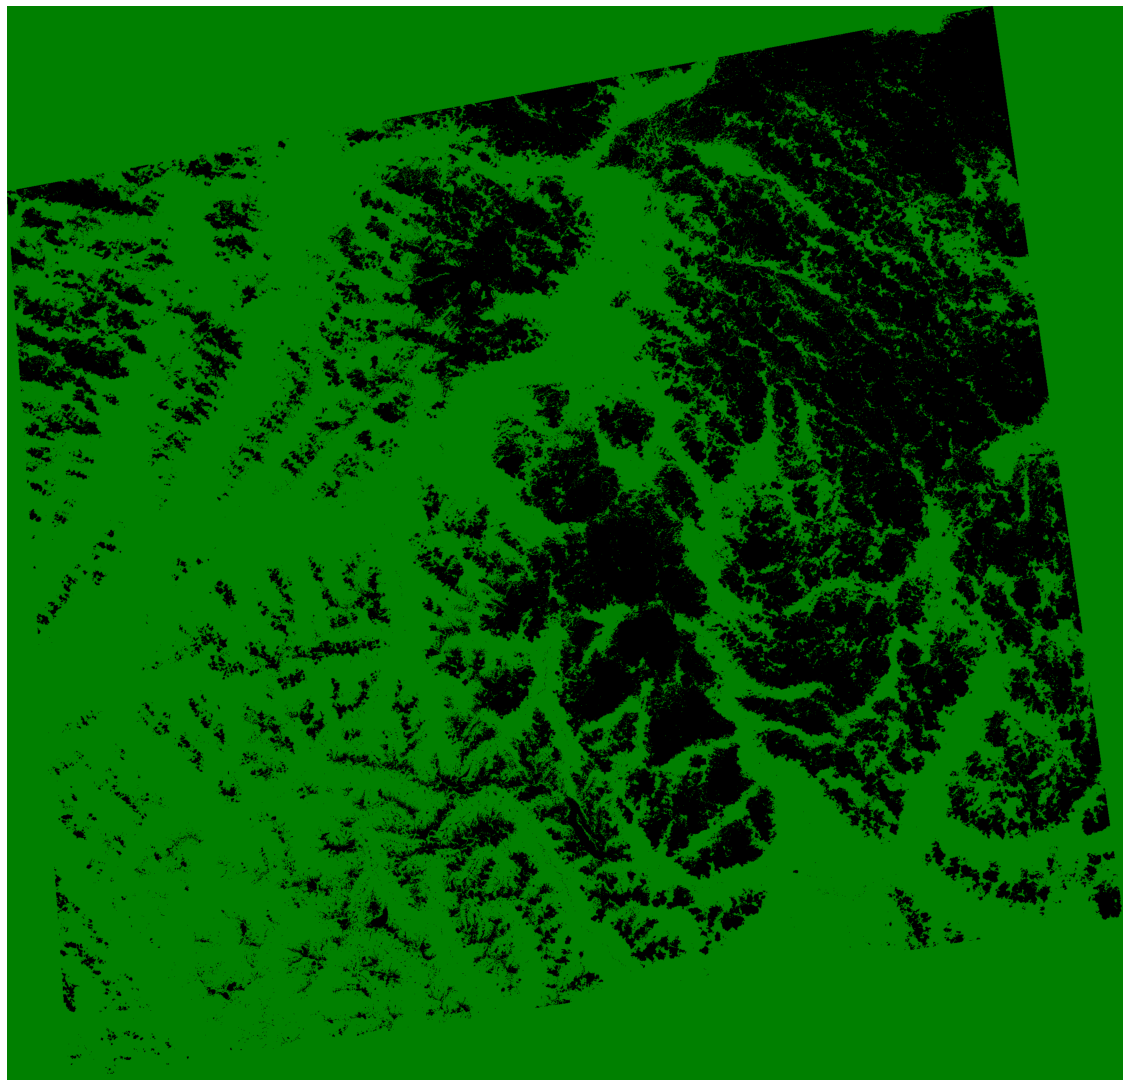

In [24]:
plt.figure(figsize=[20,20])
plt.imshow(cul, cmap=col_map)
plt.axis('off')
plt.savefig("tes_pred.jpg", bbox_inches='tight')
plt.show()